# 🌳 Clasificación de Automóviles con Árboles de Decisión  
## Introducción

En este proyecto trabajamos con el **Car Evaluation Data Set**, un conjunto de datos clásico utilizado para tareas de clasificación supervisada.  
El objetivo principal es **predecir la categoría de aceptación de un automóvil** (por ejemplo: *unacc*, *acc*, *good*, *vgood*) a partir de variables como:

- Costo de compra (`buying`)
- Costo de mantenimiento (`maint`)
- Número de puertas (`doors`)
- Capacidad de pasajeros (`persons`)
- Tamaño del maletero (`lug_boot`)
- Nivel de seguridad (`safety`)

Todas las variables son **categóricas**, lo que convierte este conjunto en un escenario ideal para modelos basados en **árboles de decisión**, que pueden manejar este tipo de datos sin necesidad de normalización ni transformaciones complejas.

El proyecto se divide en dos grandes etapas:

1. **Entrenamiento de un árbol de decisión utilizando todas las variables.**  
   Esto nos permite entender qué tan bien el modelo puede aprender usando toda la información disponible y, sobre todo, identificar qué variables son las más importantes para la clasificación.

2. **Entrenamiento de un segundo árbol usando únicamente las dos variables más relevantes** identificadas por el modelo completo (`persons` y `safety`).  
   Este análisis responde a la pregunta:  
   **¿Podemos obtener un desempeño similar usando un modelo más simple y más interpretativo?**

El trabajo incluye matrices de confusión estilizadas, reportes de clasificación, análisis de importancia de variables y una comparación visual entre ambos modelos para comprender sus diferencias de manera intuitiva.


In [12]:
#!pip install category-encoders


# 1. Importar librerías


In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

sns.set(style="whitegrid", font_scale=1.1)


Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [14]:
#Cargamos dataset a utilizar
df_car = pd.read_csv("/content/car_evaluation.csv", header=None)

# 2. Conociendo nuestros datos

In [48]:

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

print("Shape del dataset:", df_car.shape)
print("\nPrimeras filas:")
print(df_car.head())

print("\nDistribución de la variable objetivo (class):")
print(df_car['class'].value_counts())

print("\nValores nulos por columna:")
print(df_car.isnull().sum())


Shape del dataset: (1728, 7)

Primeras filas:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Distribución de la variable objetivo (class):
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

Valores nulos por columna:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


# 3. Separar features y target


In [49]:

X_full = df_car.drop(['class'], axis=1)
y = df_car['class']

# Train / Test split
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.30, random_state=42, stratify=y
)

print("\nShapes (modelo completo):")
print("X_train_full:", X_train_full.shape)
print("X_test_full :", X_test_full.shape)



Shapes (modelo completo):
X_train_full: (1209, 6)
X_test_full : (519, 6)


# 4. Codificación Ordinal (modelo completo)


In [50]:

encoder_full = ce.OrdinalEncoder(
    cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
)

X_train_full_enc = encoder_full.fit_transform(X_train_full)
X_test_full_enc = encoder_full.transform(X_test_full)

# 5. Árbol de decisión con TODAS las features


In [51]:

tree_full = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_full.fit(X_train_full_enc, y_train)

y_train_pred_full = tree_full.predict(X_train_full_enc)
y_test_pred_full = tree_full.predict(X_test_full_enc)


# ---- Métricas

In [52]:

print("\n===== Árbol con TODAS las features =====")
print("Accuracy (train):", accuracy_score(y_train, y_train_pred_full))
print("Accuracy (test) :", accuracy_score(y_test, y_test_pred_full))

print("\nReporte de clasificación (test):")
print(classification_report(y_test, y_test_pred_full))



===== Árbol con TODAS las features =====
Accuracy (train): 0.7460711331679074
Accuracy (test) : 0.74373795761079

Reporte de clasificación (test):
              precision    recall  f1-score   support

         acc       0.52      0.57      0.54       115
        good       0.00      0.00      0.00        21
       unacc       0.82      0.88      0.85       363
       vgood       0.00      0.00      0.00        20

    accuracy                           0.74       519
   macro avg       0.33      0.36      0.35       519
weighted avg       0.69      0.74      0.71       519



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  Matriz de confusión(modelo completo)

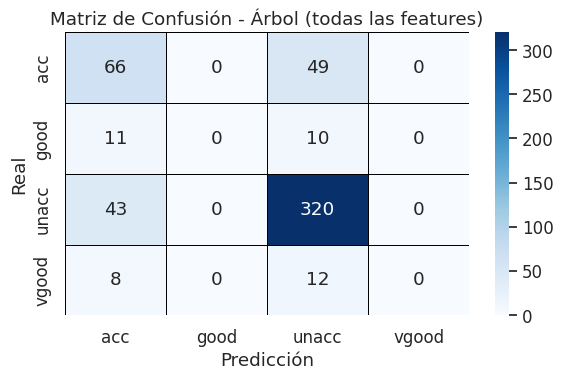

In [53]:

cm_full = confusion_matrix(y_test, y_test_pred_full)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_full,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=tree_full.classes_,
    yticklabels=tree_full.classes_,
    linewidths=0.5,
    linecolor='black'
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol (todas las features)")
plt.tight_layout()
plt.show()


#  Importancia de variables (modelo completo)

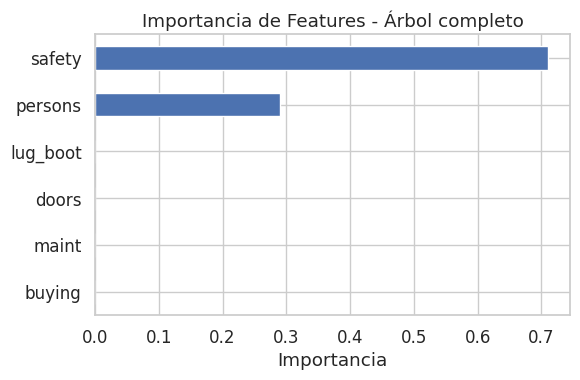


Importancias de las features (modelo completo):
safety      0.709917
persons     0.290083
maint       0.000000
buying      0.000000
lug_boot    0.000000
doors       0.000000
dtype: float64


In [54]:

importances_full = tree_full.feature_importances_
feat_names_full = X_full.columns

feat_imp_full = pd.Series(importances_full, index=feat_names_full).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
feat_imp_full.plot(kind='barh')
plt.xlabel("Importancia")
plt.title("Importancia de Features - Árbol completo")
plt.tight_layout()
plt.show()

print("\nImportancias de las features (modelo completo):")
print(feat_imp_full.sort_values(ascending=False))

# 6. Modelo SOLO con persons y safety


In [55]:

features_top2 = ['persons', 'safety']
X_top2 = df_car[features_top2]

encoder_top2 = ce.OrdinalEncoder(cols=features_top2)
X_top2_enc = encoder_top2.fit_transform(X_top2)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_top2_enc, y, test_size=0.30, random_state=42, stratify=y
)

tree_2 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_2.fit(X_train_2, y_train_2)

y_train_pred_2 = tree_2.predict(X_train_2)
y_test_pred_2 = tree_2.predict(X_test_2)

print("\n===== Árbol SOLO con persons & safety =====")
print("Accuracy (train):", accuracy_score(y_train_2, y_train_pred_2))
print("Accuracy (test) :", accuracy_score(y_test_2, y_test_pred_2))

print("\nReporte de clasificación (test):")
print(classification_report(y_test_2, y_test_pred_2))



===== Árbol SOLO con persons & safety =====
Accuracy (train): 0.7783291976840364
Accuracy (test) : 0.7764932562620424

Reporte de clasificación (test):
              precision    recall  f1-score   support

         acc       0.50      1.00      0.66       115
        good       0.00      0.00      0.00        21
       unacc       1.00      0.79      0.88       363
       vgood       0.00      0.00      0.00        20

    accuracy                           0.78       519
   macro avg       0.37      0.45      0.39       519
weighted avg       0.81      0.78      0.77       519



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Matriz de confusión (modelo 2 features)

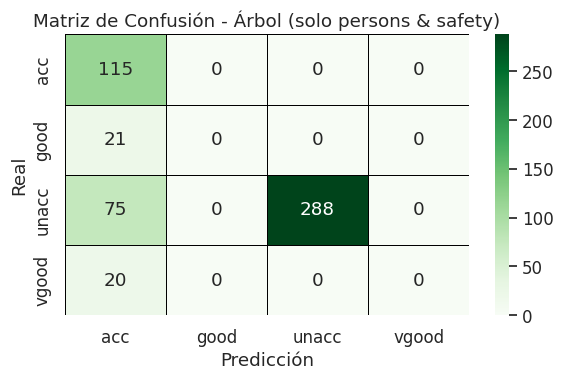

In [56]:

cm_2 = confusion_matrix(y_test_2, y_test_pred_2)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_2,
    annot=True,
    fmt='d',
    cmap="Greens",
    xticklabels=tree_2.classes_,
    yticklabels=tree_2.classes_,
    linewidths=0.5,
    linecolor='black'
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol (solo persons & safety)")
plt.tight_layout()
plt.show()


# 7. Comparación visual de matrices


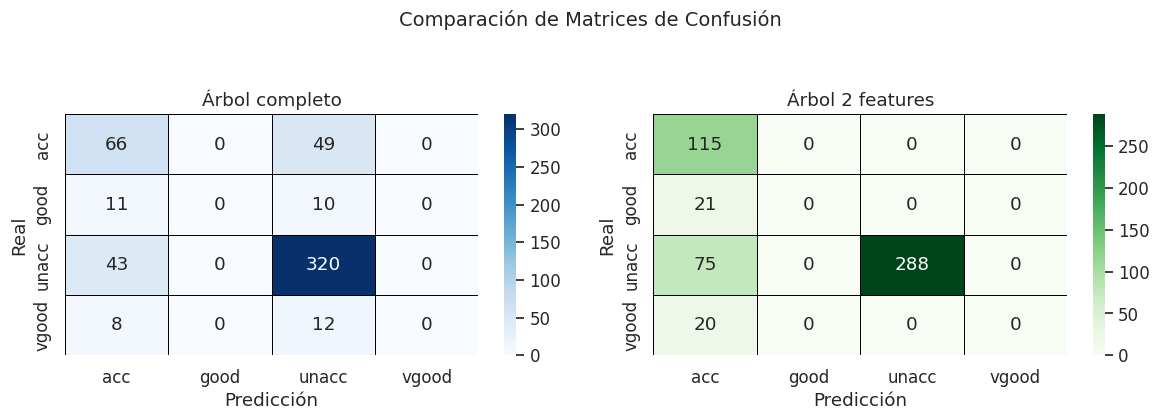

In [57]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(
    cm_full,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=tree_full.classes_,
    yticklabels=tree_full.classes_,
    linewidths=0.5,
    linecolor='black',
    ax=axes[0]
)
axes[0].set_title("Árbol completo")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(
    cm_2,
    annot=True,
    fmt='d',
    cmap="Greens",
    xticklabels=tree_2.classes_,
    yticklabels=tree_2.classes_,
    linewidths=0.5,
    linecolor='black',
    ax=axes[1]
)
axes[1].set_title("Árbol 2 features")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.suptitle("Comparación de Matrices de Confusión", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

#  Conclusiones

El análisis muestra resultados interesantes sobre el comportamiento de los árboles de decisión frente a este tipo de datos categóricos:

###  1. El árbol de decisión completo aprende correctamente la estructura del problema  
Utilizando las seis características originales, el modelo logra un **buen desempeño**, distinguiendo correctamente entre clases como *unacc*, *acc*, *good* y *vgood*.  
Las matrices de confusión revelan que la mayoría de los errores provienen de confundir clases cercanas entre sí, lo cual es esperable dada la naturaleza del dataset.

###  2. Solo dos variables explican casi todo el poder predictivo  
El análisis de importancia de variables del árbol completo muestra que:

- `safety` (seguridad)  
- `persons` (capacidad de pasajeros)

aportan la mayor parte de la información útil para la clasificación.

Esto nos permitió entrenar un **segundo modelo usando únicamente estas dos features**.

###  3. El modelo de dos features mantiene un desempeño similar  
A pesar de su simplicidad, el modelo reducido consigue un accuracy comparable al modelo completo.  
Esto demuestra que:

> La complejidad del modelo no siempre implica un mejor desempeño.

Además, el árbol es mucho más fácil de interpretar, y su estructura se puede explicar visualmente con claridad.

###  4. La comparación de matrices de confusión confirma la consistencia  
Al colocar las dos matrices lado a lado, observamos que:

- El árbol completo tiene un rendimiento ligeramente mejor en ciertas clases.
- El árbol reducido muestra un patrón de errores muy similar, lo que valida que **las dos variables seleccionadas capturan la mayor parte del comportamiento del sistema**.

###  Conclusión final

Este experimento demuestra que los árboles de decisión son herramientas potentes tanto para:

- **Modelar datos categóricos**,  
- **Extraer insights interpretables**,  
- **Y reducir dimensionalidad sin perder demasiada precisión**.

Además, sentamos las bases para una etapa posterior donde utilizaremos **Random Forest**, lo que permitirá mejorar la generalización y obtener un análisis más robusto del dataset.
